<h1>Iris Flowers Classification:</h1><hr/>

<h1>Let's Grow More (LGM-VIP21) </h1>
<h3>Beginner Level Task<br><br>Task- 01</h3><br>
Datasetlink : <a href="http://archive.ics.uci.edu/ml/datasets/Iris" >http://archive.ics.uci.edu/ml/datasets/Iris</a>
<h1><hr/>

<h1>Import Modules</h1>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

<h2>Load The Dataset</h2>

In [30]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names=["sepal_length_in_cm","sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm","class"])

In [31]:
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.shape

(150, 5)

In [33]:
df.isnull().sum()

sepal_length_in_cm    0
sepal_width_in_cm     0
petal_length_in_cm    0
petal_width_in_cm     0
class                 0
dtype: int64

<AxesSubplot:xlabel='sepal_width_in_cm', ylabel='petal_width_in_cm'>

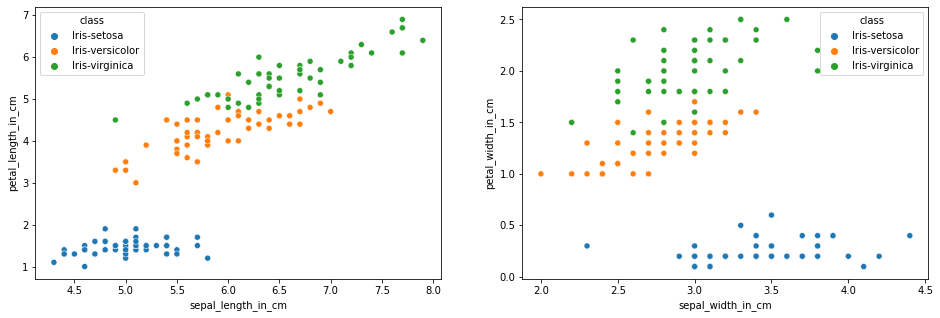

In [34]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='sepal_length_in_cm',y='petal_length_in_cm',data=df,hue='class',ax=ax1)
sns.scatterplot(x='sepal_width_in_cm',y='petal_width_in_cm',data=df,hue='class',ax=ax2)

<AxesSubplot:xlabel='class', ylabel='Count'>

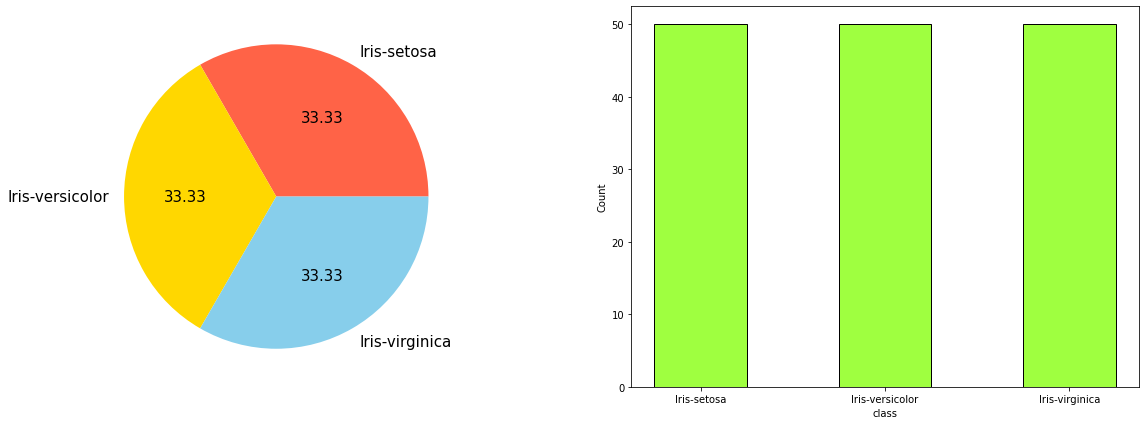

In [35]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,7))
df.groupby('class').size().plot(kind='pie',autopct='%.2f',ax=ax1,textprops={'fontsize':15,'color':'black'},colors=['tomato','gold','skyblue'])
plt.axes(ax1).set_ylabel('')
sns.histplot(df['class'],shrink=0.5,ax=ax2,color='chartreuse')

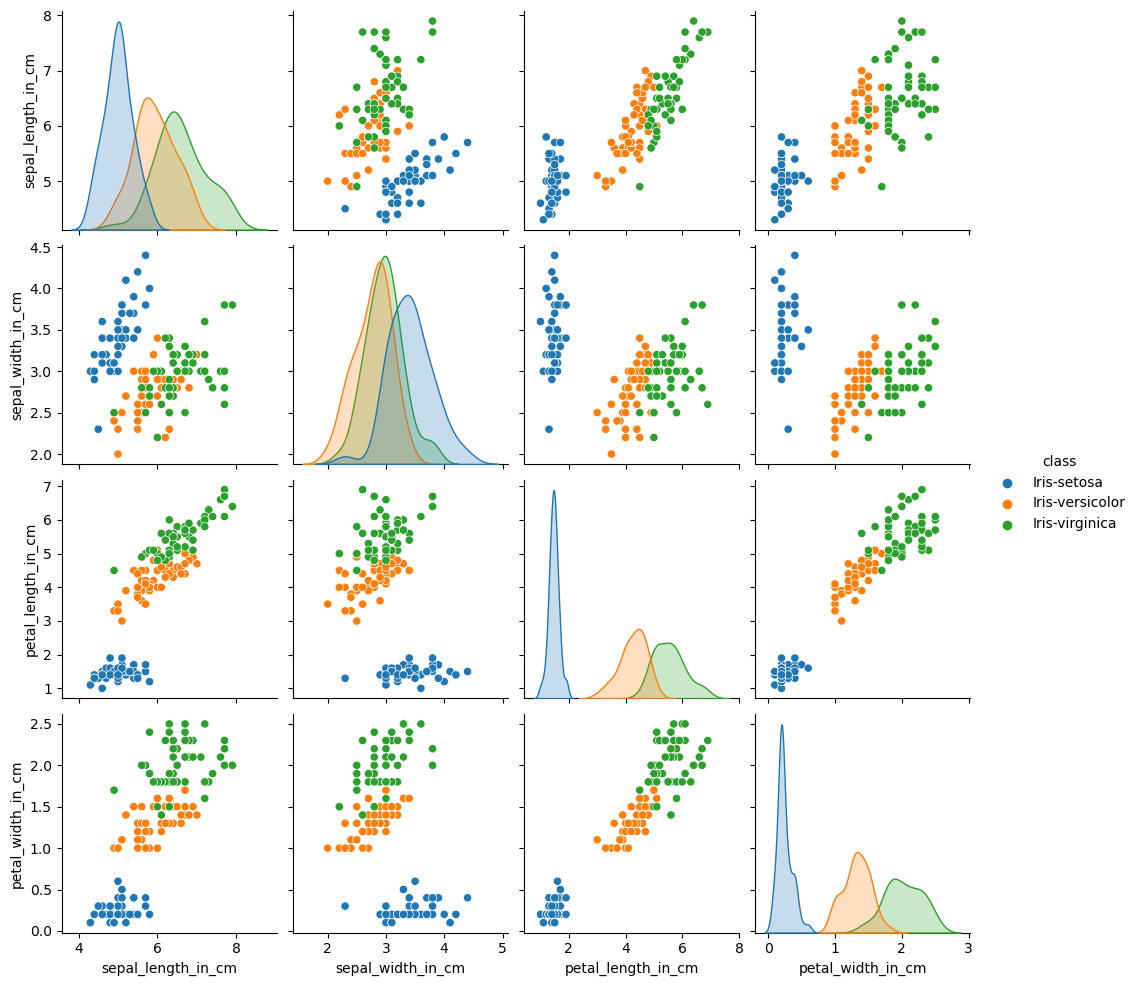

In [36]:
plt.style.use("default")
sns.pairplot(df,hue="class")

In [37]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [38]:
df.replace({'class':{'Iris-versicolor':1 , 'Iris-setosa':2 , 'Iris-virginica':3 }},inplace=True)

<h1>Separating features and target</h1>

In [39]:
x = df.drop(columns=['class'])
y = df['class']

In [40]:
print(x)
print(y)

     sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     petal_width_in_cm  
0                  0.2  
1                  0.2  
2                  0.2  
3                  0.2  
4                  0.2  
..                 ...  
145                2.3  
146    

In [41]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [42]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


<h1>Training model [ KNN Algorithm ]</h1>

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [44]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
x_train_prediction = model.predict(x_train)

In [46]:
print(x_train_prediction)

[3 2 1 3 1 2 3 1 1 3 1 1 3 1 2 3 2 1 2 2 2 1 3 3 2 3 3 3 1 2 2 3 1 1 3 3 1
 2 1 2 3 1 1 2 1 1 1 3 2 1 2 1 3 2 1 2 2 2 3 3 2 2 3 3 1 3 1 1 3 2 3 3 3 2
 3 2 2 1 3 1 3 1 1 3 1 1 1 3 3 3 3 2 1 1 1 1 3 1 2 2 3 1 3 2 3 2 3 3 2 1 2
 3 1 2 3 1 2 2 3 2]


<h2>Accuracy Of Predicting The Training Data</h2>

In [47]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
cm=confusion_matrix(y_train,x_train_prediction)
print("KNeighborsClassifier : ",training_data_accuracy)
print("\nConfusion Matrix : \n",cm)

KNeighborsClassifier :  0.9583333333333334

Confusion Matrix : 
 [[39  0  3]
 [ 0 36  0]
 [ 2  0 40]]


<h2>Accuracy Of predicting The Testing Data</h2>

In [48]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
cmt=confusion_matrix(y_test,x_test_prediction)
print("KNeighborsClassifier : ",test_data_accuracy)
print("\nConfusion Matrix : \n",cmt)

KNeighborsClassifier :  1.0

Confusion Matrix : 
 [[ 8  0  0]
 [ 0 14  0]
 [ 0  0  8]]


<h1>Testing of model Using Pickle

In [49]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pklmodel = pickle.load(open('model.pkl','rb'))
sl=float(input("\nsepal length in cm : "))
sw=float(input("sepal width in cm : "))
pl=float(input("petal length incm : "))
pw=float(input("petal width in cm : "))
out=pklmodel.predict([[sl,sw,pl,pw]])
def nts(arg):
    switcher = {1:'Iris-versicolor' , 2:'Iris-setosa' , 3:'Iris-virginica' }
    return switcher[arg]
print("\nThe predicted flower name with {:.2f} % accuracy is '{}'".format(training_data_accuracy,nts(out[0])))


sepal length in cm : 5.1
sepal width in cm : 5.5
petal length incm : 1.4
petal width in cm : 0.2

The predicted flower name with 0.96 % accuracy is 'Iris-setosa'


<h1>Thank You</h1>